In [97]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [98]:
# Now, sir send us data ------------------- HomeWork
# we have to do work on this data detect outliers and remove outliers for each and every column.

In [99]:
df1 = pd.read_csv("water_potability.csv")
df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


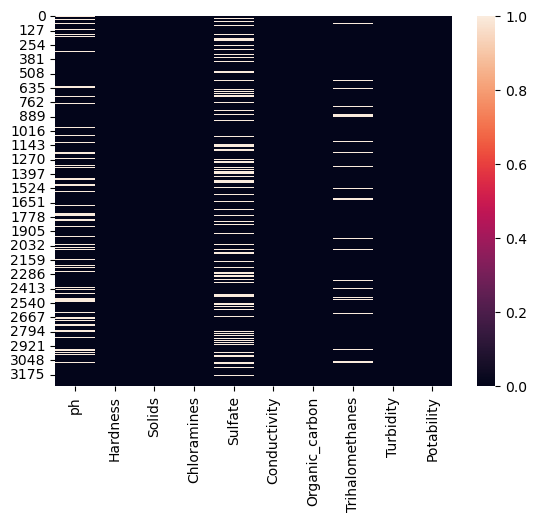

In [100]:
sns.heatmap(df1.isnull())
plt.show()

In [101]:
df1.shape

(3276, 10)

In [102]:
df1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [104]:
# filling data in missing values. In data Outliers present use median for fill data on missing values.

# ph
df1.ph.fillna(df1.ph.median(), inplace = True)

# Sulfate
df1.Sulfate.fillna(df1.Sulfate.median(), inplace = True)

# Trihalomethanes
df1.Trihalomethanes.fillna(df1.Trihalomethanes.median(), inplace = True)

In [105]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

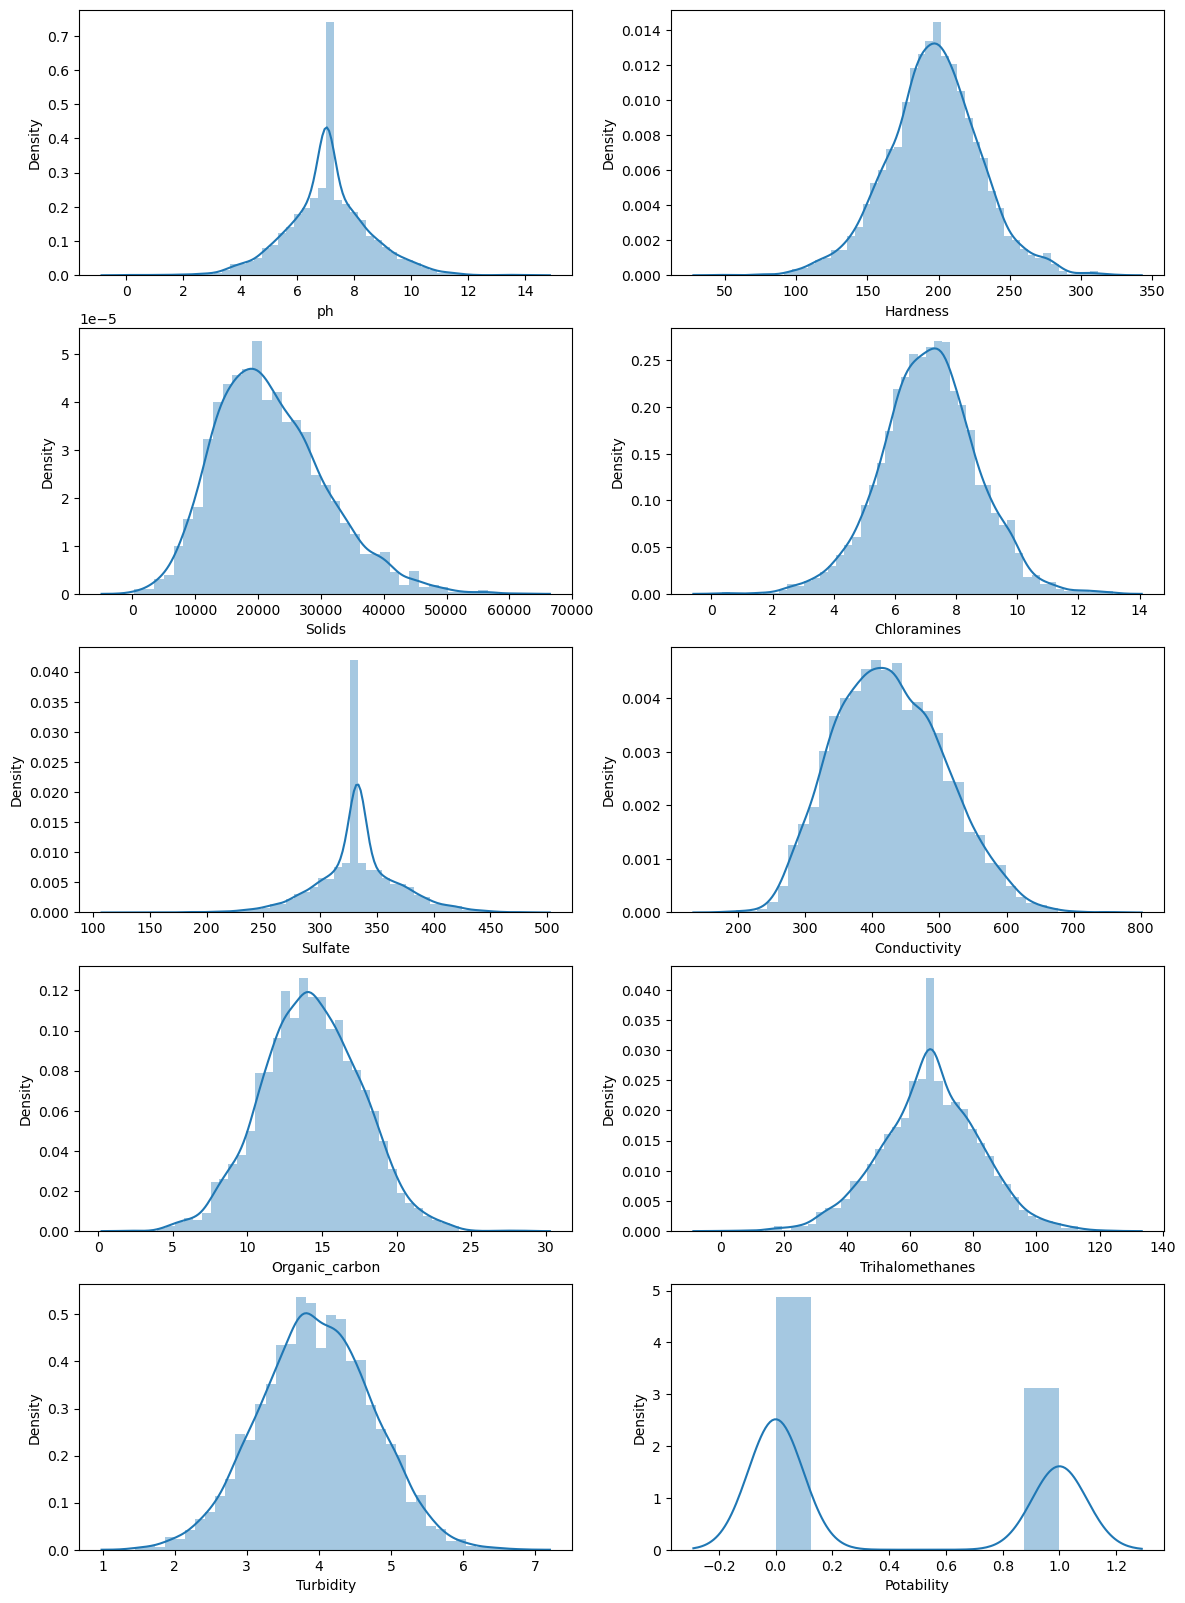

In [106]:
# Checking sequence of Outliers using "Distribution Plot" .
plt.figure(figsize = (14,20)) # figure size 16 = width, height = 10, this size tell us about figure size (width and height)

plt.subplot(5,2,1)  # (2,2,1) (how many rows count or (nrows), how many columns count or (ncols), In which place or (index))
sns.distplot(df1['ph'])

plt.subplot(5,2,2)
sns.distplot(df1['Hardness'])

plt.subplot(5,2,3)
sns.distplot(df1['Solids'])

plt.subplot(5,2,4)
sns.distplot(df1['Chloramines'])

plt.subplot(5,2,5)
sns.distplot(df1['Sulfate'])

plt.subplot(5,2,6)
sns.distplot(df1['Conductivity'])

plt.subplot(5,2,7)
sns.distplot(df1['Organic_carbon'])

plt.subplot(5,2,8)
sns.distplot(df1['Trihalomethanes'])

plt.subplot(5,2,9)
sns.distplot(df1['Turbidity'])

plt.subplot(5,2,10)
sns.distplot(df1['Potability'])

plt.show()


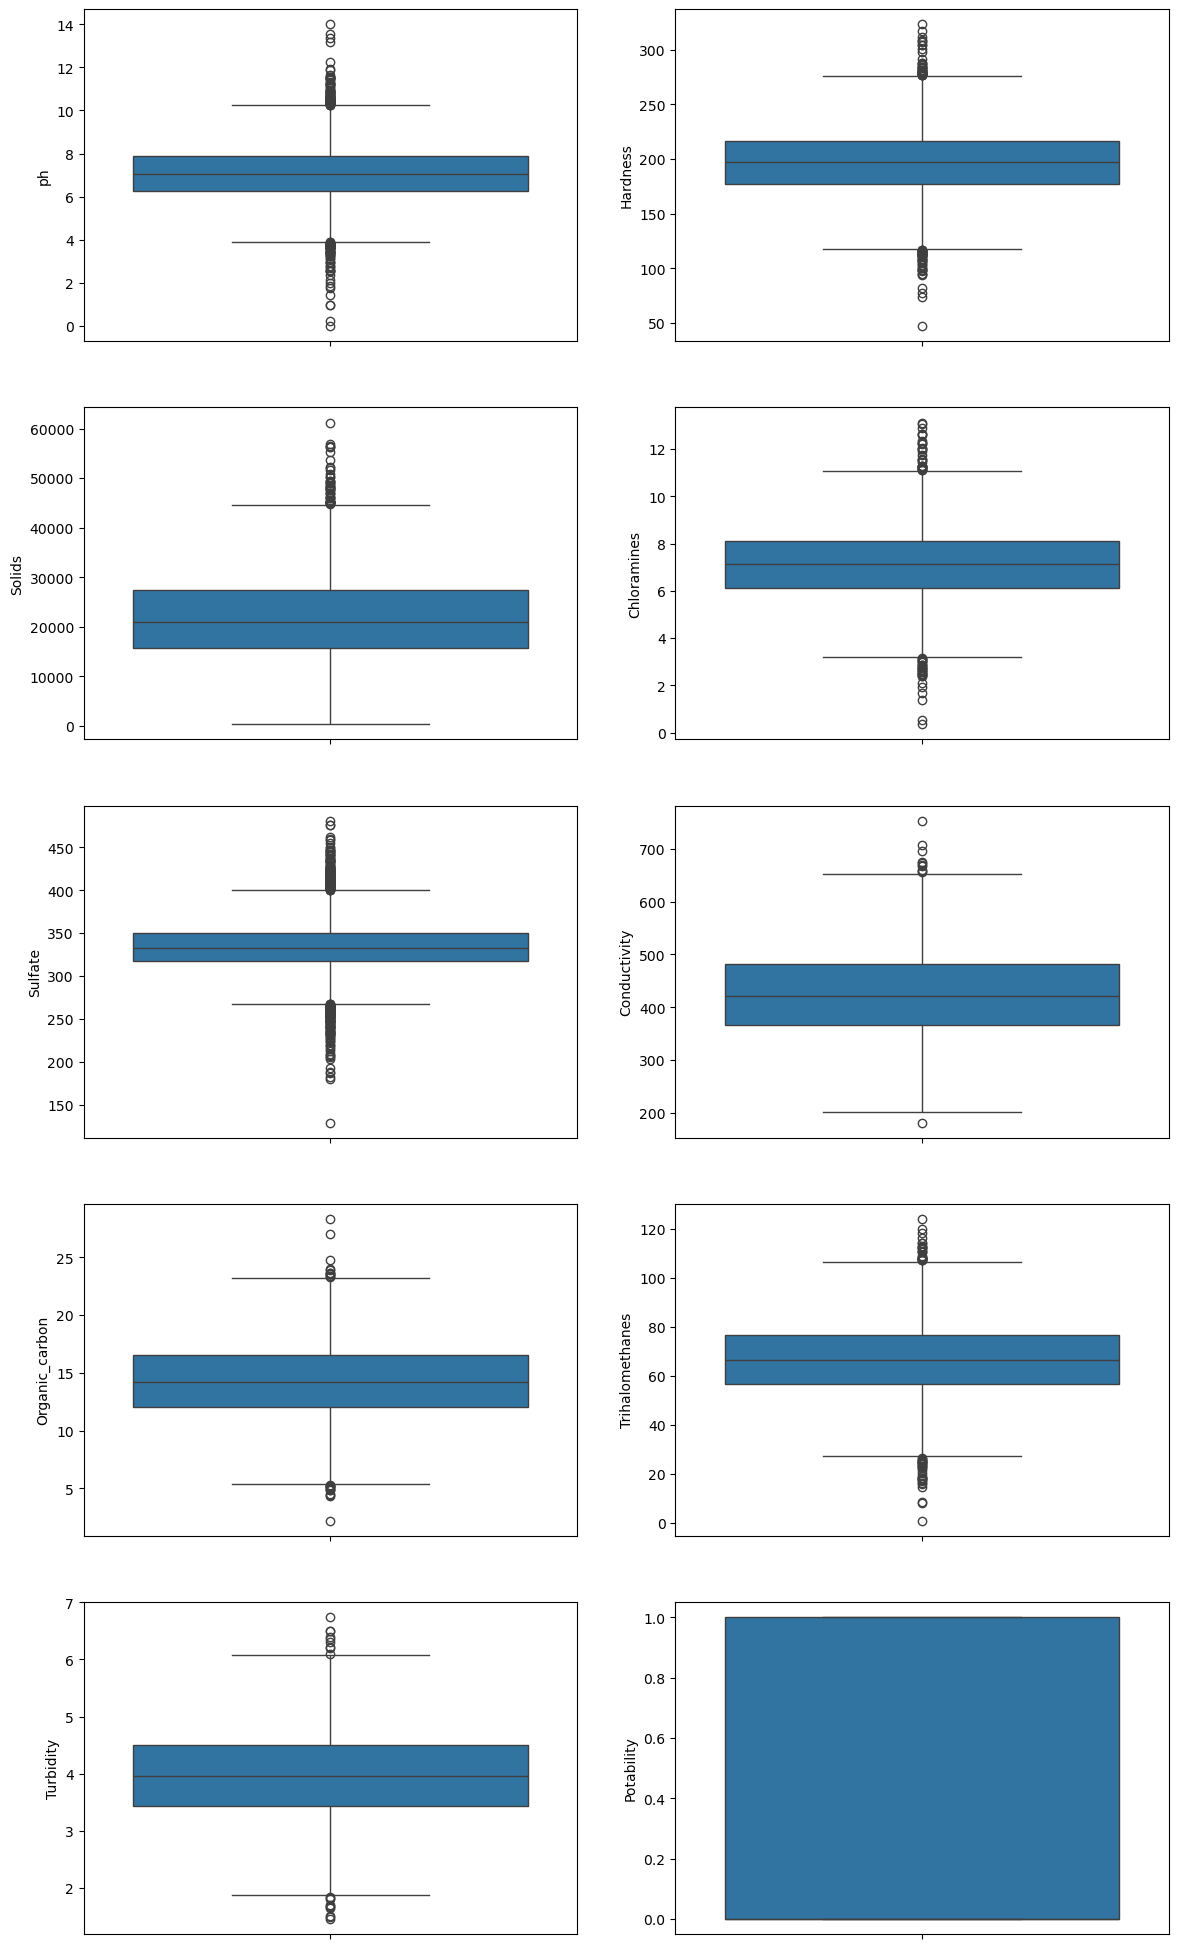

In [107]:
# Checking Outliers using box plot for all columns.
plt.figure(figsize = (14,25)) 

plt.subplot(5,2,1)
sns.boxplot(df1['ph'])

plt.subplot(5,2,2)
sns.boxplot(df1['Hardness'])

plt.subplot(5,2,3)
sns.boxplot(df1['Solids'])

plt.subplot(5,2,4)
sns.boxplot(df1['Chloramines'])

plt.subplot(5,2,5)
sns.boxplot(df1['Sulfate'])

plt.subplot(5,2,6)
sns.boxplot(df1['Conductivity'])

plt.subplot(5,2,7)
sns.boxplot(df1['Organic_carbon'])

plt.subplot(5,2,8)
sns.boxplot(df1['Trihalomethanes'])

plt.subplot(5,2,9)
sns.boxplot(df1['Turbidity'])

plt.subplot(5,2,10)
sns.boxplot(df1['Potability'])

plt.show()

In [108]:
# Detect and Remove Outliers Column wise

In [109]:
# For Column1 ---> "ph"
print("ph column1 ---")
q1_ph = df1['ph'].quantile(0.25)
q3_ph = df1['ph'].quantile(0.75)
print("Q1 :", q1_ph)
print("Q3 :", q3_ph)
print("IQR :", q3_ph - q1_ph)

ph column1 ---
Q1 : 6.277672635884397
Q3 : 7.870049755247176
IQR : 1.5923771193627791


In [110]:
# lets find no. of Outliers
# for that we have to find the upper and lower Outlier limits

print("ph column1 ---")
outlier_lower_limit = q1_ph - 1.5 * (q3_ph - q1_ph)
outlier_upper_limit = q3_ph + 1.5 * (q3_ph - q1_ph)
print("Outlier Lower limit :", outlier_lower_limit)
print("Outlier Upper limit :", outlier_upper_limit)

ph column1 ---
Outlier Lower limit : 3.889106956840228
Outlier Upper limit : 10.258615434291345


In [111]:
df1[df1['ph']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
32,10.433291,117.791230,22326.892046,8.161505,307.707509,412.986834,12.890709,65.733478,5.057311,0
47,10.682966,173.375498,15758.740621,5.570784,307.352586,323.807913,10.090870,78.472784,3.999775,0
54,10.560745,181.893366,21783.651033,6.991260,340.390378,456.556402,16.482835,34.252049,3.964686,0
125,10.308478,217.219746,27653.235184,8.912266,369.531206,382.951505,6.580402,59.576040,3.285077,0
...,...,...,...,...,...,...,...,...,...,...
3142,10.503787,125.975185,38605.331530,8.710553,333.073546,674.443476,9.714220,51.697894,5.370458,1
3233,10.485604,136.577381,32872.380566,8.399435,276.921835,416.188546,18.884625,60.078413,4.669240,1
3246,10.667364,173.381945,28912.202201,7.071294,276.634391,286.063394,17.685651,55.147364,4.135569,1
3249,10.808157,198.596751,29614.348790,5.782418,304.622061,383.269410,14.902820,47.896406,4.362542,1


In [112]:
df1[df1['ph']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0
36,3.641630,183.908722,24752.072460,5.538314,286.059556,456.860096,9.034067,73.594657,3.464353,0
76,3.514546,158.732076,23029.663614,6.821679,286.522847,307.379142,9.712232,79.850929,3.762615,0
77,3.722500,163.639747,37962.167991,6.684570,326.694018,467.562973,14.567269,50.577979,3.662838,0
...,...,...,...,...,...,...,...,...,...,...
3014,0.000000,214.846144,49456.587108,7.897539,333.073546,583.448849,7.702328,77.712891,4.928840,0
3088,2.128531,192.696422,24905.284521,7.757770,383.519892,473.550065,14.286493,56.347830,3.842109,0
3094,1.985383,216.480025,23039.328505,6.769268,344.014256,341.078379,11.498237,78.733441,3.923093,0
3107,3.337629,216.257087,42310.827498,8.130663,333.073546,352.264074,14.029673,52.760961,3.300192,0


In [113]:
data_df1 = df1[(df1.ph>outlier_lower_limit) & (df1.ph<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


<Axes: ylabel='ph'>

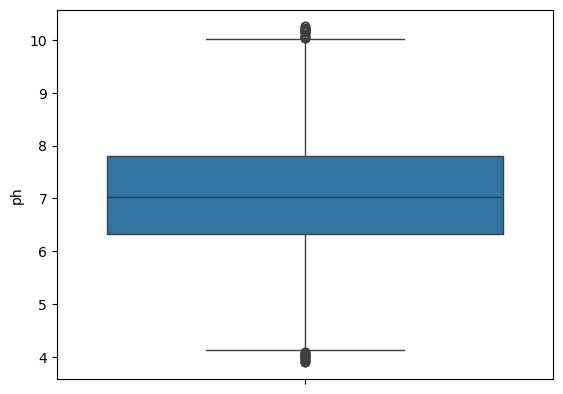

In [114]:
sns.boxplot(data_df1['ph'])

In [115]:
# For Column2 ---> "Hardness"
print("Hardness column2 ---")
q1_Hardness = df1['Hardness'].quantile(0.25)
q3_Hardness = df1['Hardness'].quantile(0.75)
print("Q1 :", q1_Hardness)
print("Q3 :", q3_Hardness)
print("IQR :", q3_Hardness - q1_Hardness)

Hardness column2 ---
Q1 : 176.85053787752437
Q3 : 216.66745621487073
IQR : 39.81691833734635


In [116]:
# lets find no. of Outliers
# for that we have to find the upper and lower Outlier limits

print("Hardness column2 ---")
outlier_lower_limit = q1_Hardness - 1.5 * (q3_Hardness - q1_Hardness)
outlier_upper_limit = q3_Hardness + 1.5 * (q3_Hardness - q1_Hardness)
print("Outlier Lower limit :", outlier_lower_limit)
print("Outlier Upper limit :", outlier_upper_limit)

Hardness column2 ---
Outlier Lower limit : 117.12516037150485
Outlier Upper limit : 276.3928337208903


In [117]:
df1[df1['Hardness']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
18,8.975464,279.357167,19460.398131,6.204321,333.073546,431.443990,12.888759,63.821237,2.436086,0
37,5.618064,304.235912,17281.975168,6.101084,333.073546,399.471566,12.265002,81.588992,2.896547,0
88,10.155440,300.292476,12652.362979,6.655126,398.647786,487.459131,9.347634,67.919789,5.002467,0
156,7.036752,281.268667,22452.090808,6.773699,343.635821,395.341775,14.903080,67.125168,4.444350,0
180,7.917049,278.056321,27192.280561,9.220128,424.787996,358.781736,15.054313,56.839602,3.659485,0
187,8.661592,284.098352,27088.476460,7.897857,333.073546,512.277310,16.912142,72.465763,3.670431,0
218,7.957768,276.733569,17162.398421,7.841542,397.431962,514.421722,14.529779,60.559699,3.450746,0
260,4.997771,280.082411,26849.194735,6.130757,374.232961,297.611540,15.571571,70.560275,3.404633,1
262,6.548021,278.585105,25508.386949,6.749378,366.871502,497.321753,16.563167,79.323678,3.611860,1
275,5.324942,280.089655,35344.658047,13.043806,180.206746,392.421496,10.504820,55.084668,4.427138,1


In [118]:
df1[df1['Hardness']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
51,7.809632,100.457615,12013.550629,5.212315,247.200826,605.220124,9.611349,66.084174,2.447444,0
67,7.036752,103.464759,27420.167425,8.417305,333.073546,485.974500,11.351133,67.869964,4.620793,0
71,5.704765,116.299330,33223.581529,7.050503,297.078153,504.378681,9.001820,48.147031,4.157533,0
149,5.187472,104.752425,20060.078727,6.913911,333.073546,368.815429,15.140348,98.656646,3.203258,0
189,6.626012,112.299485,25839.894104,7.658747,312.247043,327.248079,19.409147,85.785103,4.194313,0
215,7.036752,105.859264,37928.142177,5.609440,333.073546,358.888768,12.207108,71.119890,3.873853,0
227,7.083779,112.820254,8580.245561,4.210284,234.852699,434.747715,23.399516,94.160307,3.887681,0
246,4.705356,103.173587,19555.765052,6.767298,333.073546,370.178166,9.182834,93.900486,3.437450,0
258,9.802721,98.771644,27357.456745,9.218150,323.199077,512.428731,14.168934,59.454440,2.764634,1
263,13.175402,47.432000,19237.949676,8.907020,375.147315,500.245952,12.083896,66.622485,4.106924,1


In [119]:
data_df1 = df1[(df1.Hardness>outlier_lower_limit) & (df1.Hardness<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Hardness'>

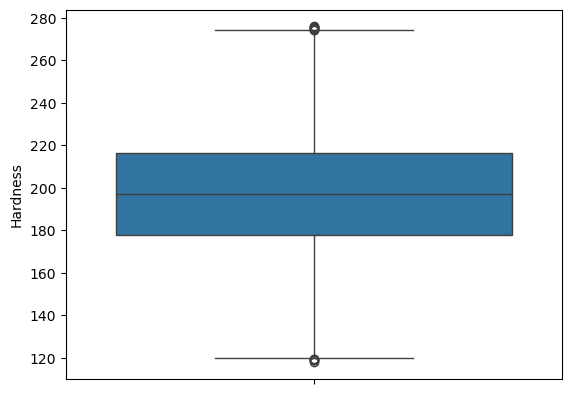

In [120]:
sns.boxplot(data_df1['Hardness'])

In [121]:
# For Column3 ---> "Solids"
print("Solids column3 ---")
q1_Solids = df1['Solids'].quantile(0.25)
q3_Solids = df1['Solids'].quantile(0.75)
print("Q1 :", q1_Solids)
print("Q3 :", q3_Solids)
print("IQR :", q3_Solids - q1_Solids)

Solids column3 ---
Q1 : 15666.69029696465
Q3 : 27332.762127438615
IQR : 11666.071830473964


In [122]:
outlier_lower_limit = q1_Solids - 1.5 * (q3_Solids - q1_Solids)
outlier_upper_limit = q3_Solids + 1.5 * (q3_Solids - q1_Solids)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : -1832.4174487462951
Outlier upper limit : 44831.86987314956


In [123]:
df1[df1['Solids']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
142,6.825468,187.051710,46140.126850,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450,0
186,6.340028,225.028148,45222.506665,5.809032,363.005755,435.500457,11.385937,80.670311,3.686001,0
283,10.356119,136.323752,48621.563952,9.158704,327.922751,365.720292,17.975564,77.359854,4.201849,1
287,10.003301,143.094285,46113.957485,12.912187,333.073546,574.555041,16.963310,36.767671,4.746382,1
366,4.037288,291.461897,52318.917298,7.779459,333.073546,401.204271,16.542921,87.814800,3.045049,1
378,6.105140,249.141391,45249.449033,7.369360,338.771307,314.965090,11.251778,88.657477,3.103090,1
405,7.036752,286.201763,46931.884293,7.440024,262.526456,557.421879,14.471650,74.043860,4.120931,1
516,5.412762,226.586488,45510.584319,7.070185,307.621462,420.124761,21.940190,58.851736,4.091206,0
546,3.410360,207.397473,49074.730407,5.667433,301.975011,351.520393,15.987370,86.639186,3.721766,0
613,6.057828,230.717693,44868.458368,6.443392,333.073546,397.236784,14.037903,76.701609,3.292249,0


In [124]:
df1[df1['Solids']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [125]:
data_df1 = df1[(df1.Solids>outlier_lower_limit) & (df1.Solids<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Solids'>

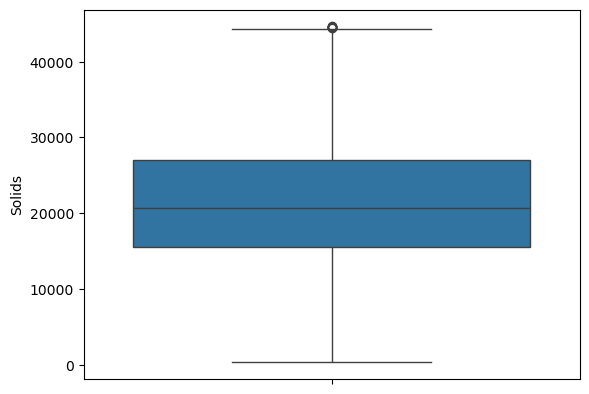

In [126]:
sns.boxplot(data_df1['Solids'])

In [127]:
# For Column4 ---> "Chloramines"
print("Chloramines column1 ---")
q1_Chloramines = df1['Chloramines'].quantile(0.25)
q3_Chloramines = df1['Chloramines'].quantile(0.75)
print("Q1 :", q1_Chloramines)
print("Q3 :", q3_Chloramines)
print("IQR :", q3_Chloramines - q1_Chloramines)

Chloramines column1 ---
Q1 : 6.1274207554913
Q3 : 8.114887032109028
IQR : 1.9874662766177282


In [128]:
outlier_lower_limit = q1_Chloramines - 1.5 * (q3_Chloramines - q1_Chloramines)
outlier_upper_limit = q3_Chloramines + 1.5 * (q3_Chloramines - q1_Chloramines)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 3.1462213405647073
Outlier upper limit : 11.09608644703562


In [129]:
df1[df1['Chloramines']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
272,6.512737,229.263861,22475.046873,12.580026,192.033592,479.501279,9.983462,66.668576,4.612964,1
275,5.324942,280.089655,35344.658047,13.043806,180.206746,392.421496,10.504820,55.084668,4.427138,1
287,10.003301,143.094285,46113.957485,12.912187,333.073546,574.555041,16.963310,36.767671,4.746382,1
304,8.923981,135.938467,27919.770666,12.363285,333.073546,415.629484,11.949914,69.314880,4.155583,1
324,7.886591,213.052591,38852.029636,11.170789,281.700777,326.115350,10.385172,64.662501,4.589984,1
351,8.848586,188.919983,32033.332019,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
434,6.143921,175.274076,29072.169654,12.062536,287.698157,469.983324,13.142493,83.279658,3.476213,0
456,6.256651,181.072307,16905.801524,11.586151,333.073546,481.307052,10.639743,74.557241,4.181051,0
534,5.006563,160.496448,27218.821976,11.543190,289.975777,303.256343,16.569391,70.699066,3.665206,0
549,7.036752,164.378433,15908.561870,11.208688,333.073546,360.814296,17.239577,60.179119,4.380978,0


In [130]:
df1[df1['Chloramines']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
285,3.882631,243.807950,7751.809491,0.530351,333.073546,341.291116,12.990592,60.109968,3.734001,1
408,6.443754,196.615992,25740.412591,2.484380,435.672765,352.353623,16.924419,33.051888,4.498685,1
437,9.462666,225.399307,12224.624604,2.981379,387.098720,485.697274,13.204394,62.297699,2.850184,0
454,8.534407,248.577482,22372.303267,2.993744,366.146249,341.760198,14.692902,78.708937,2.544734,0
509,7.457165,263.036704,31085.083433,1.683993,333.073546,584.604354,11.809444,45.501362,4.106543,0
651,6.555439,195.157976,15405.496481,2.750837,333.073546,436.278076,10.855263,66.622485,3.792040,0
666,7.036752,155.675777,52060.226800,2.577555,365.080963,323.001036,14.166602,48.254307,2.000757,1
772,6.769835,177.173258,34596.001872,2.866073,369.532996,389.516286,17.268074,64.868608,3.655790,1
806,4.739549,162.246886,27215.902742,2.862535,372.815075,437.217590,15.130476,65.091291,2.942348,1
1106,6.879959,163.593339,44586.812651,2.741712,219.148935,554.045105,16.521942,67.533260,5.688207,1


In [131]:
data_df1 = df1[(df1.Chloramines>outlier_lower_limit) & (df1.Chloramines<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Chloramines'>

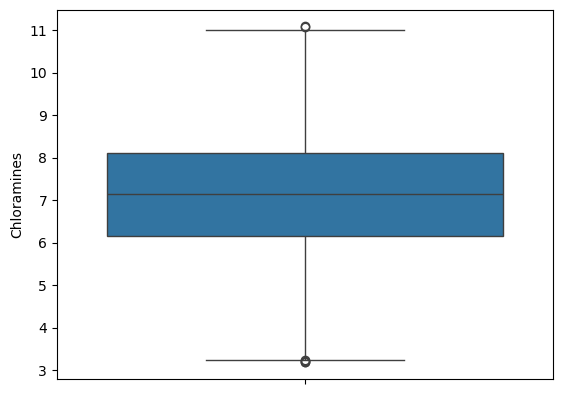

In [132]:
sns.boxplot(data_df1['Chloramines'])

In [133]:
# For Column5 ---> "Sulfate"
print("Sulfate column1 ---")
q1_Sulfate = df1['Sulfate'].quantile(0.25)
q3_Sulfate = df1['Sulfate'].quantile(0.75)
print("Q1 :", q1_Sulfate)
print("Q3 :", q3_Sulfate)
print("IQR :", q3_Sulfate - q1_Sulfate)

Sulfate column1 ---
Q1 : 317.0946377261117
Q3 : 350.38575630240354
IQR : 33.29111857629181


In [134]:
outlier_lower_limit = q1_Sulfate - 1.5 * (q3_Sulfate - q1_Sulfate)
outlier_upper_limit = q3_Sulfate + 1.5 * (q3_Sulfate - q1_Sulfate)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 267.15795986167404
Outlier upper limit : 400.3224341668413


In [135]:
df1[df1['Sulfate']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0
112,7.725333,252.265491,36477.738112,8.386761,426.543590,339.411327,17.485844,60.483885,3.724837,0
126,7.036752,252.670469,29368.674184,9.906147,433.952212,465.216621,13.221034,84.198607,5.052737,0
180,7.917049,278.056321,27192.280561,9.220128,424.787996,358.781736,15.054313,56.839602,3.659485,0
248,6.581878,272.982745,37169.444404,8.114731,416.083481,351.476839,15.129334,79.261026,4.201663,0
...,...,...,...,...,...,...,...,...,...,...
3083,5.264284,142.534126,25556.053128,6.600787,416.262799,443.759231,7.491362,72.879848,5.100240,0
3084,7.971299,151.032930,29827.793969,7.662154,405.829894,376.912212,19.382739,78.160133,2.439140,0
3090,7.664628,150.667210,33918.040823,8.746295,406.476119,436.335622,15.216930,66.622485,3.487407,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [136]:
df1[df1['Sulfate']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
51,7.809632,100.457615,12013.550629,5.212315,247.200826,605.220124,9.611349,66.084174,2.447444,0
84,6.395359,133.834229,23827.275015,5.127747,266.908428,573.400295,9.833875,95.026609,4.191218,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,66.622485,3.149158,0
130,6.643936,151.889600,10909.194592,3.749625,240.936722,437.909005,15.264742,64.203964,3.812953,0
199,4.126529,125.474884,11215.945902,5.366011,261.444798,445.241457,18.575921,86.433655,4.460201,0
...,...,...,...,...,...,...,...,...,...,...
3023,5.287983,245.023461,27733.713099,7.135063,238.844004,464.074850,13.452179,55.642363,3.311034,0
3082,5.093675,251.313780,30245.956975,6.718830,267.026093,271.630738,14.882428,70.778408,4.552571,0
3162,9.079715,222.042631,53735.899194,6.894915,254.040977,382.896167,12.704887,101.615346,4.551724,1
3176,8.610963,125.158770,32079.774815,9.844921,264.052839,342.205252,12.947376,53.950269,4.614400,1


In [137]:
data_df1 = df1[(df1.Sulfate>outlier_lower_limit) & (df1.Sulfate<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Sulfate'>

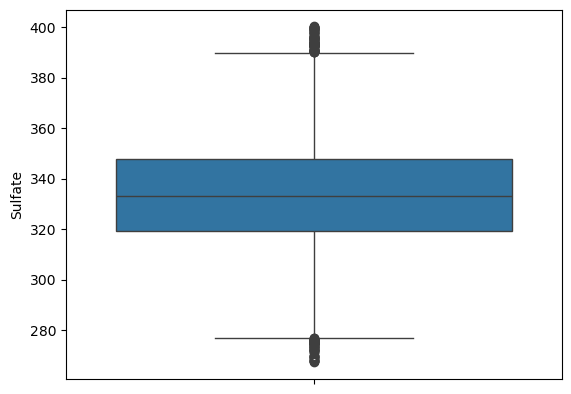

In [138]:
sns.boxplot(data_df1['Sulfate'])

In [139]:
# For Column6 ---> "Conductivity"
print("Conductivity column1 ---")
q1_Conductivity = df1['Conductivity'].quantile(0.25)
q3_Conductivity = df1['Conductivity'].quantile(0.75)
print("Q1 :", q1_Conductivity)
print("Q3 :", q3_Conductivity)
print("IQR :", q3_Conductivity - q1_Conductivity)

Conductivity column1 ---
Q1 : 365.7344141184627
Q3 : 481.7923044877282
IQR : 116.05789036926546


In [140]:
outlier_lower_limit = q1_Conductivity - 1.5 * (q3_Conductivity - q1_Conductivity)
outlier_upper_limit = q3_Conductivity + 1.5 * (q3_Conductivity - q1_Conductivity)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 191.64757856456453
Outlier upper limit : 655.8791400416264


In [141]:
df1[df1['Conductivity']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
66,5.058109,238.569380,34873.934523,8.983276,374.433505,669.725086,13.353181,76.521800,5.106656,0
140,8.594416,270.022706,15791.675351,5.912691,333.073546,672.556999,20.184051,54.961285,3.568992,0
342,5.910252,282.739017,15244.846395,6.636551,363.384683,695.369528,13.138353,89.801011,3.660923,1
1183,7.064789,188.391725,20567.145930,7.443243,360.322976,656.924128,16.274831,84.827183,4.401628,1
1269,3.846814,190.992873,26895.257956,5.629536,333.073546,660.254946,18.125202,78.153575,3.584202,0
1295,8.015780,180.060377,12135.724930,6.259376,310.068681,666.690618,17.660149,66.588849,3.180580,0
2134,5.632041,203.730481,19345.922475,8.047798,265.347111,708.226364,15.752252,69.195926,3.511985,0
2704,8.839584,246.066476,21179.762588,7.717662,343.047384,753.342620,16.917901,60.436032,3.118039,0
2737,6.602540,174.632977,21607.483238,6.581327,308.931421,657.570422,9.064445,68.827047,3.592496,1
3142,10.503787,125.975185,38605.331530,8.710553,333.073546,674.443476,9.714220,51.697894,5.370458,1


In [142]:
df1[df1['Conductivity']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1384,6.983133,181.119529,17503.31223,6.931628,333.073546,181.483754,11.59834,72.033901,4.426983,0


In [143]:
data_df1 = df1[(df1.Conductivity>outlier_lower_limit) & (df1.Conductivity<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Conductivity'>

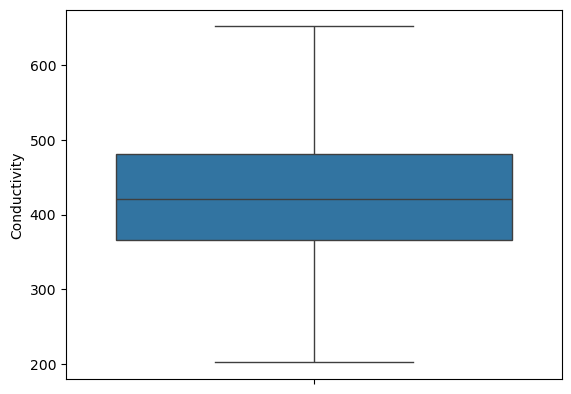

In [144]:
sns.boxplot(data_df1['Conductivity'])

In [145]:
# For Column7 ---> "Organic_carbon"
print("Organic_carbon column1 ---")
q1_Organic_carbon = df1['Organic_carbon'].quantile(0.25)
q3_Organic_carbon = df1['Organic_carbon'].quantile(0.75)
print("Q1 :", q1_Organic_carbon)
print("Q3 :", q3_Organic_carbon)
print("IQR :", q3_Organic_carbon - q1_Organic_carbon)

Organic_carbon column1 ---
Q1 : 12.065801333613067
Q3 : 16.557651543843434
IQR : 4.491850210230368


In [146]:
outlier_lower_limit = q1_Organic_carbon - 1.5 * (q3_Organic_carbon - q1_Organic_carbon)
outlier_upper_limit = q3_Organic_carbon + 1.5 * (q3_Organic_carbon - q1_Organic_carbon)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 5.328026018267515
Outlier upper limit : 23.295426859188986


In [147]:
df1[df1['Organic_carbon']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
43,9.920691,202.817483,9973.934059,6.882248,337.350529,333.192470,23.917601,71.833624,4.690707,0
227,7.083779,112.820254,8580.245561,4.210284,234.852699,434.747715,23.399516,94.160307,3.887681,0
420,6.457098,192.264945,18340.046806,8.832138,335.970114,517.432197,23.373265,51.797100,2.637365,0
558,6.145243,213.175589,20417.264416,6.243743,333.073546,435.376529,23.514774,81.299133,4.090940,0
698,6.246264,163.218038,26408.881768,6.029670,429.022312,509.956864,23.569645,19.175175,5.044455,1
1055,7.036752,205.438977,20113.897568,7.248374,317.280210,558.953873,23.952450,68.242206,3.651865,0
1792,7.036752,230.430762,14916.986091,9.618516,333.073546,379.172804,28.300000,79.633064,3.864931,0
1827,7.392084,173.528778,20185.676229,9.120931,384.117247,310.074851,23.317699,81.129543,3.778458,0
2057,5.690387,241.215729,14083.829888,5.738962,293.465164,498.282978,24.755392,70.728902,2.988621,0
2236,6.380717,266.015410,21250.935634,4.854335,357.241027,358.185473,27.006707,59.937785,4.532020,0


In [148]:
df1[df1['Organic_carbon']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
333,7.022952,264.525606,15978.355249,10.956205,262.064551,412.709423,5.315287,76.024491,4.971907,1
785,5.140801,209.358561,21407.614287,4.415976,230.555856,378.897190,2.200000,86.737223,4.192257,1
876,8.020869,175.873676,21759.363929,7.487278,352.983112,428.660965,4.966862,72.305219,3.442121,0
1390,7.593177,201.068737,19214.186357,7.710120,351.386080,451.211449,4.371899,74.673986,3.542093,0
1447,5.122648,195.018888,17279.513749,7.027441,336.466042,446.712219,4.861631,72.837540,3.504525,0
1536,6.336589,106.380113,15570.142322,6.851405,441.587654,380.433019,5.218233,48.735514,4.356594,1
1663,7.036752,204.384794,32951.316369,5.995277,324.505190,339.641882,4.473092,71.190496,4.905230,0
1689,7.614057,213.691169,17598.200350,8.131319,333.073546,384.087281,5.051695,70.833219,3.437946,0
2082,10.284126,249.324199,23259.012449,3.331266,284.405913,468.866264,5.188466,67.622616,2.844633,0
2138,5.168340,206.269755,17914.340231,11.240000,333.073546,357.696971,4.902888,72.084700,3.841163,0


In [149]:
data_df1 = df1[(df1.Organic_carbon>outlier_lower_limit) & (df1.Organic_carbon<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Organic_carbon'>

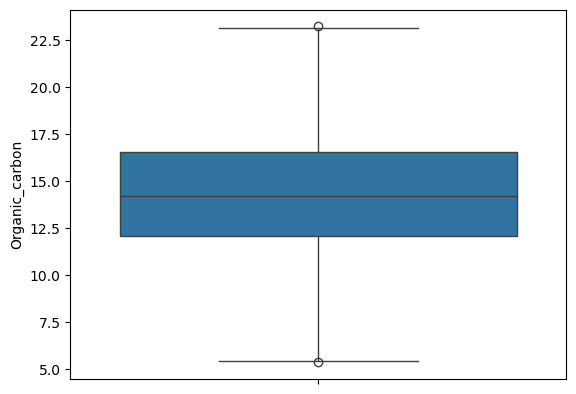

In [150]:
sns.boxplot(data_df1['Organic_carbon'])

In [151]:
# For Column8 ---> "Trihalomethanes"
print("Trihalomethanes column1 ---")
q1_Trihalomethanes = df1['Trihalomethanes'].quantile(0.25)
q3_Trihalomethanes = df1['Trihalomethanes'].quantile(0.75)
print("Q1 :", q1_Trihalomethanes)
print("Q3 :", q3_Trihalomethanes)
print("IQR :", q3_Trihalomethanes - q1_Trihalomethanes)

Trihalomethanes column1 ---
Q1 : 56.64765567150501
Q3 : 76.66660934716015
IQR : 20.01895367565514


In [152]:
outlier_lower_limit = q1_Trihalomethanes - 1.5 * (q3_Trihalomethanes - q1_Trihalomethanes)
outlier_upper_limit = q3_Trihalomethanes + 1.5 * (q3_Trihalomethanes - q1_Trihalomethanes)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 26.619225158022296
Outlier upper limit : 106.69503986064285


In [153]:
df1[df1['Trihalomethanes']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
128,11.180695,228.300860,16600.392747,6.094001,333.073546,504.050539,15.035047,110.739299,3.809842,0
284,7.958984,171.483625,23625.813886,9.537735,259.979966,327.623881,16.117110,107.754043,4.698008,1
350,9.158445,186.672973,15797.030396,8.151081,333.812264,425.752018,12.182639,112.622733,4.525237,1
356,7.757270,213.048445,25259.780549,7.635153,363.684814,543.528799,15.254021,107.189584,4.165432,1
531,6.145148,197.541072,39657.272108,9.900159,288.157883,319.434033,11.587378,120.030077,4.600886,0
1038,5.368126,190.937979,32619.312975,8.098839,351.358134,435.666469,11.983635,107.900842,2.004143,0
1053,8.922410,207.520726,13291.922609,8.560537,357.944327,468.538326,15.692738,107.282329,4.081728,0
1081,8.546146,177.846244,23349.485417,7.652073,352.817053,413.321600,12.357385,108.849568,3.505300,1
1156,5.036454,190.164520,29258.738136,4.991061,300.475925,332.359715,11.055801,116.161622,3.534665,1
1157,7.036752,204.860505,24590.125934,7.774361,333.073546,440.936824,12.567061,118.357275,4.318272,1


In [154]:
df1[df1['Trihalomethanes']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
61,6.391354,213.017830,20965.478309,5.375560,327.650543,369.338121,13.758105,17.915723,3.923749,0
133,7.977636,245.895130,32170.069160,9.635636,399.583155,473.662453,11.728338,23.817020,3.552129,0
204,11.267828,161.896362,6040.369868,7.205414,333.073546,316.535871,11.768309,25.525267,4.153347,0
245,7.036752,217.369746,17984.327439,8.594163,333.073546,409.220776,10.213779,18.400012,3.605154,0
330,6.737004,220.100102,24694.744205,8.373660,333.073546,384.308673,6.748092,8.175876,4.063170,1
374,8.882684,135.523062,4857.253807,5.209779,333.073546,532.336659,20.296274,20.337753,3.827921,1
377,7.036752,131.547744,21626.497595,7.207846,333.073546,390.955033,14.844955,26.505484,4.728124,1
518,5.018132,169.397238,29072.038121,10.711475,297.013272,467.218073,15.913761,23.792950,4.286479,0
630,7.918150,214.186611,23823.492888,7.290878,341.173322,411.424483,19.585002,25.057375,4.028958,0
698,6.246264,163.218038,26408.881768,6.029670,429.022312,509.956864,23.569645,19.175175,5.044455,1


In [155]:
data_df1 = df1[(df1.Trihalomethanes>outlier_lower_limit) & (df1.Trihalomethanes<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Trihalomethanes'>

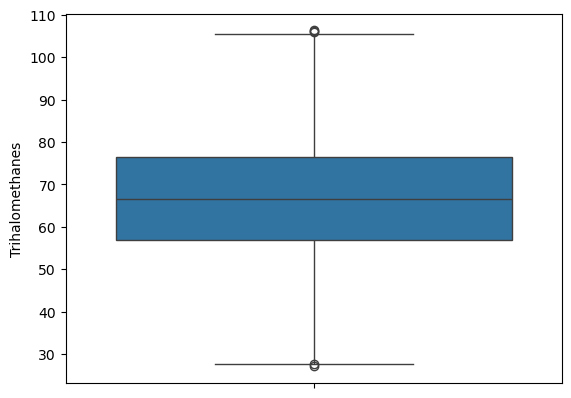

In [156]:
sns.boxplot(data_df1['Trihalomethanes'])

In [157]:
# For Column9 ---> "Turbidity"
print("Turbidity column1 ---")
q1_Turbidity = df1['Turbidity'].quantile(0.25)
q3_Turbidity = df1['Turbidity'].quantile(0.75)
print("Q1 :", q1_Turbidity)
print("Q3 :", q3_Turbidity)
print("IQR :", q3_Turbidity - q1_Turbidity)

Turbidity column1 ---
Q1 : 3.439710869612912
Q3 : 4.50031978728511
IQR : 1.060608917672198


In [158]:
outlier_lower_limit = q1_Turbidity - 1.5 * (q3_Turbidity - q1_Turbidity)
outlier_upper_limit = q3_Turbidity + 1.5 * (q3_Turbidity - q1_Turbidity)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : 1.8487974931046152
Outlier upper limit : 6.091233163793407


In [159]:
df1[df1['Turbidity']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
119,7.812804,196.583886,42550.841816,7.334648,333.073546,442.545775,14.666917,66.622485,6.204846,0
382,5.772718,213.363545,26124.931415,8.630719,273.279448,465.559286,8.006208,59.964334,6.494249,1
492,7.036752,169.188736,18408.294971,5.131839,342.937675,350.894362,19.334232,86.677328,6.739000,0
990,5.477283,165.436093,29046.083515,5.523011,370.893085,488.774595,17.265186,80.234797,6.357439,0
1073,7.203439,168.445358,22826.484697,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161,1
2377,7.402653,182.999381,19259.193937,7.632370,295.931373,339.737304,10.494609,83.118742,6.226580,1
2554,7.036752,250.572683,24538.437293,7.287605,345.109962,426.103715,13.984156,60.159730,6.099632,0
2757,6.451504,179.528925,7990.891468,6.196876,377.269841,386.541761,15.434513,74.992520,6.307678,1
2921,7.611982,190.662804,9138.029344,5.224256,329.580679,577.444713,17.209367,65.333241,6.494749,0


In [160]:
df1[df1['Turbidity']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
593,6.297846,214.214574,21022.835030,7.258722,331.821977,434.048702,15.872182,64.846905,1.680554,0
789,5.361212,171.315543,24709.728858,4.184891,366.814979,490.658747,15.122672,33.119613,1.812529,1
1290,6.907380,210.279210,40290.221636,6.874702,294.015198,340.704978,18.253472,84.022119,1.496101,0
1682,6.709822,148.253186,20922.154463,4.633574,333.073546,400.342812,18.330856,40.495596,1.687625,0
1892,7.080193,185.825726,39431.112653,8.806393,286.223876,355.937596,7.781493,39.623835,1.492207,1
1927,7.036752,179.756708,25703.155201,7.287310,333.073546,311.093065,10.238271,42.075315,1.659799,1
2724,6.232011,208.668172,12149.696730,8.560039,333.073546,325.344706,13.246995,33.380354,1.641515,1
2796,8.951652,205.892346,15189.327822,3.016033,283.867695,406.309187,19.125825,65.639328,1.844372,1
3042,4.933106,162.184382,27771.080134,7.757702,317.935411,493.304069,14.261743,77.142104,1.450000,0
3166,7.487573,149.768744,28837.330401,8.560974,333.073546,531.180998,9.536537,57.949476,1.801327,1


In [161]:
data_df1 = df1[(df1.Turbidity>outlier_lower_limit) & (df1.Turbidity<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Turbidity'>

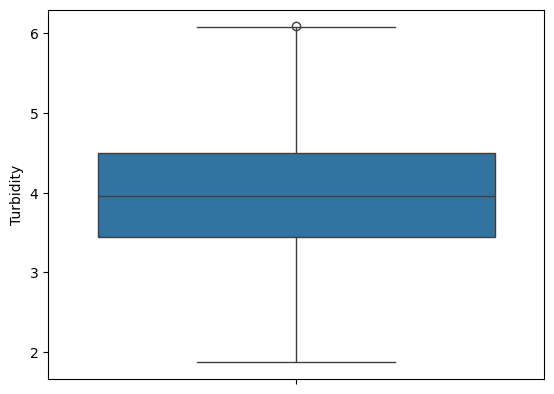

In [162]:
sns.boxplot(data_df1['Turbidity'])

In [163]:
# For Column10 ---> "Potability"
print("Potability column1 ---")
q1_Potability = df1['Potability'].quantile(0.25)
q3_Potability = df1['Potability'].quantile(0.75)
print("Q1 :", q1_Potability)
print("Q3 :", q3_Potability)
print("IQR :", q3_Potability - q1_Potability)

Potability column1 ---
Q1 : 0.0
Q3 : 1.0
IQR : 1.0


In [164]:
outlier_lower_limit = q1_Potability - 1.5 * (q3_Potability - q1_Potability)
outlier_upper_limit = q3_Potability + 1.5 * (q3_Potability - q1_Potability)
print("Outlier lower limit :", outlier_lower_limit)
print("Outlier upper limit :", outlier_upper_limit)

Outlier lower limit : -1.5
Outlier upper limit : 2.5


In [165]:
df1[df1['Potability']>outlier_upper_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [166]:
df1[df1['Potability']<outlier_lower_limit]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [167]:
data_df1 = df1[(df1.Potability>outlier_lower_limit) & (df1.Potability<outlier_upper_limit)]
data_df1.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: ylabel='Potability'>

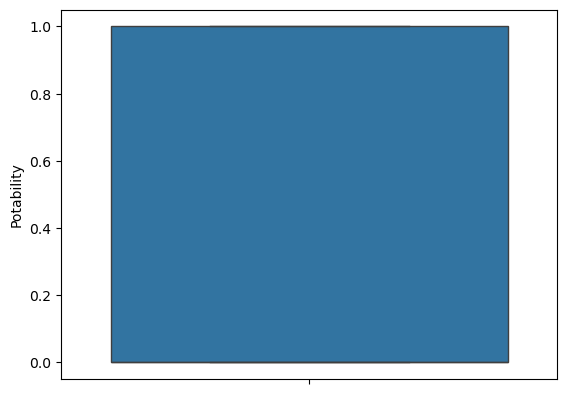

In [168]:
sns.boxplot(data_df1['Potability'])